<a href="https://colab.research.google.com/github/code269/YouTubeWebscrape/blob/main/YouTube_Webscrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Zilong Guan, Qikai Wang, An Wang**
**CIS 3120 Project**

**Premise**: There is a plethora of product reviews on YouTube in the modern age. YouTube being one of, if not the biggest media platform on the planet, is a space where companies can receive free or paid marketing (from sponsorship in paid cases). YouTube is a reliable site to find non-bias feedback for products, whether for the producer or the consumer side.

**Goal**: Provide companies and marketers with easy-to-use visual interpretations/graphs of data from YouTube. Specifically in the realm of product appraisal & providing a more concise direction for marketers to look into when creating content. Marketers can look into exactly **what** is trending for a specific type of product and **how** they can successfully market themselves to the audience.


**Part 1 & 2: Webscraping & Numpy**

Here we scrape the HTML from several YouTube websites pertaining to different companies promoting different products on YouTube. We use the examples Apple, Microsoft, and Samsung. We used basic Numpy mathematical arithmitic to create a percentage of likes over total feedback (Likes / Likes + Dislikes).

In [ ]:
#Zilong Guan, Qikai Wang, An Wang
#CIS3120 Project

from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import json
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #For the legend
import re #Regular Expressions for substitution

#Part 1 - Webscraping
#Sample Videos
videos=["https://www.youtube.com/watch?v=IC9urbiVp4M",
        "https://www.youtube.com/watch?v=cVEemOmHw9Y",
        "https://www.youtube.com/watch?v=HAZiE9NtRfs",
        "https://www.youtube.com/watch?v=x0Kv_QRWR-I",
        "https://www.youtube.com/watch?v=Sx9ibZLwVNE",
        "https://www.youtube.com/watch?v=uzt2PchQAI4",
        "https://www.youtube.com/watch?v=v5SFBpMiaiQ",
        "https://www.youtube.com/watch?v=EwxyD_dkGVA",
        "https://www.youtube.com/watch?v=fssZICsV4Rg"]
        
#Empty Lists/Dicts
list_titles = []
ratioLikes = []
numViews = []
company = []
likesNum = []
dislikesNum = []
Apple = {}
Samsung = {}
Microsoft = {}

for x in videos:
  time.sleep(5) #Delay program as sometimes "Nonetype" error shows

  #Opens HTML from video links
  html=urlopen(x)
  soup=BeautifulSoup(html, "html.parser")

  #Getting Title of Video
  t=soup.find("span", {"class":"watch-title"})
  #Removing Excess Parts of String
  title=t.text
  fixedTitle = title[5:]
  modifiedTitle = fixedTitle[:-3]
  list_titles.append(modifiedTitle)

  #Getting Channel/Uploader Name of Video
  channelCon=soup.find("div", {"class": "yt-user-info"})
  channel=channelCon.a
  company.append(channel.text) #Adds Channel Name to List

  #Getting Views of Video
  views=soup.find("div", {"class":"watch-view-count"})
  numViews.append(views.text) #Adds View Count to List

  #Getting Likes & Dislikes of Video
  likesCon=soup.find("button", {"class": "yt-uix-button yt-uix-button-size-default yt-uix-button-opacity yt-uix-button-has-icon no-icon-markup like-button-renderer-like-button like-button-renderer-like-button-clicked yt-uix-button-toggled hid yt-uix-tooltip"})
  likes=likesCon.find("span",{"class":"yt-uix-button-content"})
  dislikeCon=soup.find("button", {"class": "yt-uix-button yt-uix-button-size-default yt-uix-button-opacity yt-uix-button-has-icon no-icon-markup like-button-renderer-dislike-button like-button-renderer-dislike-button-unclicked yt-uix-clickcard-target yt-uix-tooltip"})
  dislike=dislikeCon.find("span", {"class": "yt-uix-button-content"})

  #Part 2 - Numpy (To Get the Percentage of Likes)
  lnum = float(likes.text.replace(',', '')) #turning the number of likes into a float
  dlnum = float(dislike.text.replace(',', '')) #turning the number of dislikes into a float
  varRatio = lnum+dlnum #finding the total number of likes and dislikes
  division = np.divide(lnum, varRatio) #Dividing Likes w/ Total
  percent = np.multiply(np.round(division, 2), 100) #Turns into %age
  output = str(percent) + "%"
  likesNum.append(lnum)
  dislikesNum.append(dlnum)
  ratioLikes.append(output)

**Part 3 & 4: Panda & Merging**

We created 3 different dataframes and merged them together, displaying an organized chart along with the titles of the videos, the views, company/channel name, and our L/D ratio applied from the Numpy 

In [ ]:
#Creating data for Dataframes
Apple["Titles"]=list_titles
Apple["Views"]=numViews
Apple["Company"]=company
Apple["L/D Ratio"]=ratioLikes

#Creating data for Dataframes
Samsung["Titles"]=list_titles
Samsung["Views"]=numViews
Samsung["Company"]=company
Samsung["L/D Ratio"]=ratioLikes

#Creating data for Dataframes
Microsoft["Titles"]=list_titles
Microsoft["Views"]=numViews
Microsoft["Company"]=company
Microsoft["L/D Ratio"]=ratioLikes

#Displaying with more concise format (INC)
# print("Titles: ", json_obj[list_titles])
# print("Views: ", json_obj[v])
# print("Company: ", json_obj[company])
# print("L/D Ratio: ", json_obj[ratioLikes], "\n")

#Part 3 - Panda
df1 = pd.DataFrame(Apple)
df2 = pd.DataFrame(Samsung)
df3 = pd.DataFrame(Microsoft)

#Part 4 - Merge df1-3
merged1 = pd.merge(df1,df2, on = ["Titles","Views","Company","L/D Ratio"])
merged = pd.merge(merged1,df3, on = ["Titles","Views","Company","L/D Ratio"])

merged #Displays Merged Chart

,Titles,Views,Company,L/D Ratio
0,Introducing AirPods Pro — Apple,"26,070,930 views",Apple,82.0%
1,Introducing iPhone 11 Pro — Apple,"37,223,542 views",Apple,84.0%
2,This is Apple Card,"25,516,612 views",Apple,86.0%
3,Galaxy S20 Ultra: Official Introduction,"4,351,669 views",Samsung,97.0%
4,Galaxy Z Flip: Official Introduction,"2,578,983 views",Samsung,97.0%
5,Galaxy Buds: Official Introduction,"5,209,331 views",Samsung,97.0%
6,Introducing Microsoft Surface Pro X,"1,756,353 views",Microsoft Surface,98.0%
7,Introducing Microsoft Surface Earbuds,"1,307,915 views",Microsoft Surface,96.0%
8,Introducing Surface Neo,"1,931,458 views",Microsoft Surface,98.0%


Part 5: JSON

We created a JSON object with the information from our webscrape. 

In [ ]:
#Part 5 - JSON (4/16 Added)
json_obj = {
    "titles":  list_titles,
    "views": numViews,
    "company": company,
    "ld_ratio": ratioLikes
}

print("JSON Package:")
print(json_obj, "\n")

JSON Package:
{'titles': ['Introducing AirPods Pro — Apple', 'Introducing iPhone 11 Pro — Apple', 'This is Apple Card', 'Galaxy S20 Ultra: Official Introduction', 'Galaxy Z Flip: Official Introduction', 'Galaxy Buds: Official Introduction', 'Introducing Microsoft Surface Pro X', 'Introducing Microsoft Surface Earbuds', 'Introducing Surface Neo'], 'views': ['26,070,930 views', '37,223,542 views', '25,516,612 views', '4,351,669 views', '2,578,983 views', '5,209,331 views', '1,756,353 views', '1,307,915 views', '1,931,458 views'], 'company': ['Apple', 'Apple', 'Apple', 'Samsung', 'Samsung', 'Samsung', 'Microsoft Surface', 'Microsoft Surface', 'Microsoft Surface'], 'ld_ratio': ['82.0%', '84.0%', '86.0%', '97.0%', '97.0%', '97.0%', '98.0%', '96.0%', '98.0%']} 



**Part 6: Data Aggregation**

Here we use the groupby function to create a cleaner, sleeker look for our graphs.

In [ ]:
#Part 6 Data Aggregation Qikai Wang

df1.groupby(["Company","Titles","Views"]).max() #Using the groupby to produce a cleaner look


L/D Ratio
Company           Titles                                  Views                     
Apple             Introducing AirPods Pro — Apple         26,070,930 views     82.0%
                  Introducing iPhone 11 Pro — Apple       37,223,542 views     84.0%
                  This is Apple Card                      25,516,612 views     86.0%
Microsoft Surface Introducing Microsoft Surface Earbuds   1,307,915 views      96.0%
                  Introducing Microsoft Surface Pro X     1,756,353 views      98.0%
                  Introducing Surface Neo                 1,931,458 views      98.0%
Samsung           Galaxy Buds: Official Introduction      5,209,331 views      97.0%
                  Galaxy S20 Ultra: Official Introduction 4,351,669 views      97.0%
                  Galaxy Z Flip: Official Introduction    2,578,983 views      97.0%

**Part 7: Graphing**

Here we created a bar graph which shows viewership for each video congregated to each other based on company/channel name.

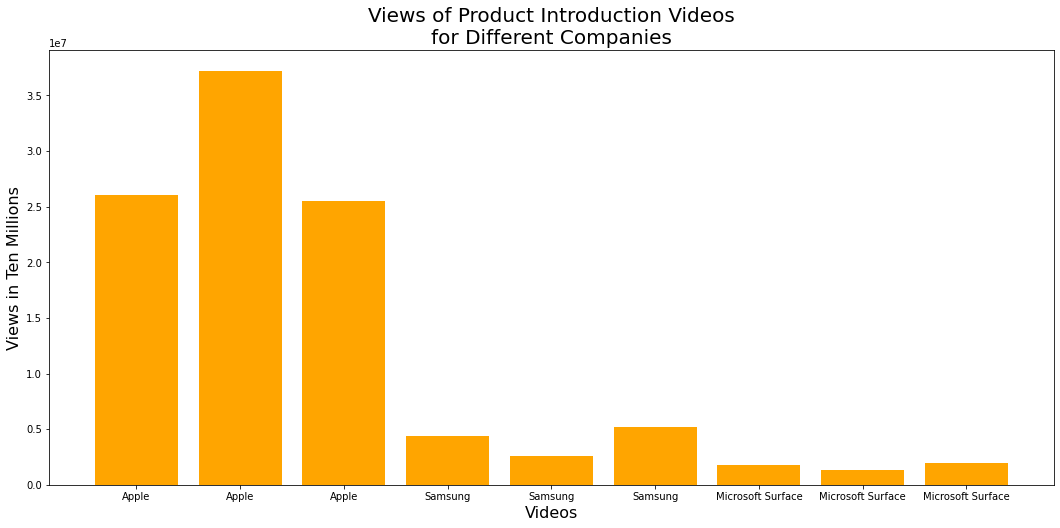

In [ ]:
#Part 7 Graphs Qikai Wang

number=[]

company=df1["Company"] #store the names of the companies in a new list
company_pos = [x for x, _ in enumerate(company)] #enumerate the entry for insertion into the graph

for v in numViews: #for every entry in our list of views
  v = v.replace(",","") #take out the commas
  v = v[:-5] # and get rid of the "views" part of the entry
  number.append(int(v)) #and finally turn it into a int

plt.subplots(figsize=(18,8)) #size the graph to display the x axis without overlap

plt.bar(company_pos, number, color='orange') #inserting elements into the graph and creating it

plt.xlabel("Videos", fontsize=16) 
plt.ylabel("Views in Ten Millions", fontsize=16)
plt.title("Views of Product Introduction Videos\n"+"for Different Companies", fontsize=20) #writing our labels and title

plt.xticks(company_pos, company) #editing the x-axis to show the names of the companies

plt.show() #show the graph

**Part 7 Graphing (Cont.)**

Bar graph which visualizes the likes to dislikes ratio

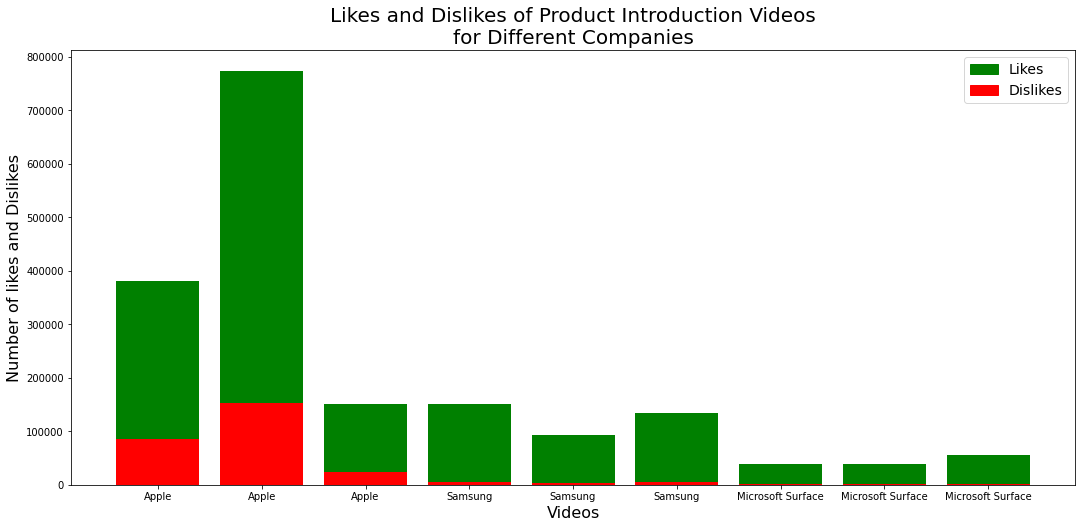

In [ ]:
plt.subplots(figsize=(18,8)) #size the graph to display the x axis without overlap

r1 = np.arange(len(likesNum))
r2 = [x for x in r1]

plt.bar(r1, likesNum, color='green') #inserting elements into the graph and creating it
plt.bar(r2, dislikesNum, color='red')

plt.xlabel("Videos", fontsize=16) 
plt.ylabel("Number of likes and Dislikes", fontsize=16)
plt.title("Likes and Dislikes of Product Introduction Videos\n"+"for Different Companies", fontsize= 20) #writing our labels and title

plt.xticks(company_pos, company) #editing the x-axis to show the names of the companies

green = mpatches.Patch(color='green', label='Likes')
red = mpatches.Patch(color='red', label='Dislikes')
plt.legend(handles=[green, red], fontsize=14)

plt.show() #show the graph

**Part 7: Graphs (Pie Chart)**

More graphs to illustrate our data & findings.

Shows viewership spread, Apple dominating out of the three companies.

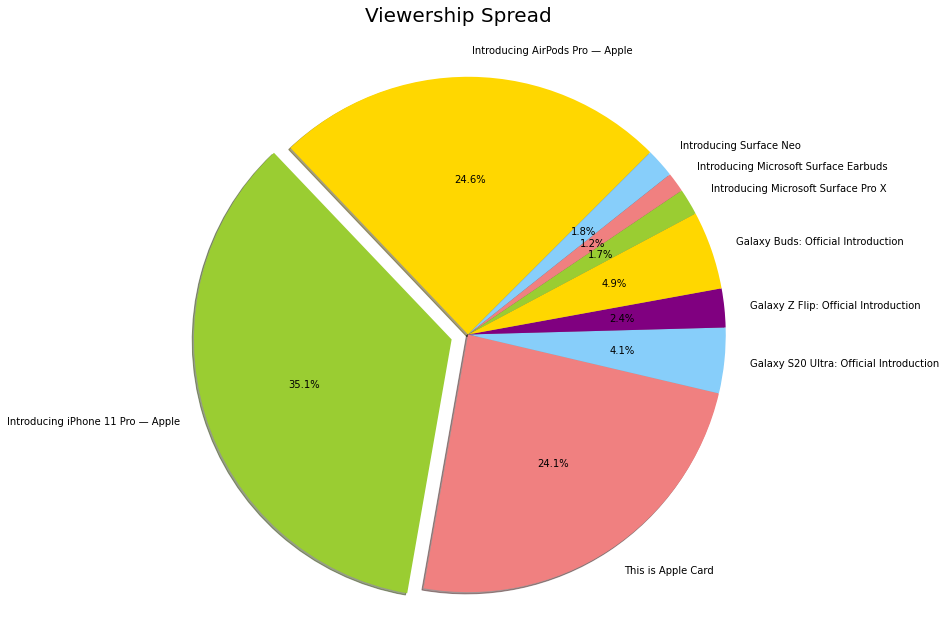

In [ ]:
#Zilong Guan - Part 7 (Cont.)

viewsAsInt = [] #Empty list that we'll use for pie chart

#Converting strings (e.g: 26,070,502 views -> 26070502 to an int)
#Prints commented out to be utilized in presentation

for currentIndex in numViews:
  # print(currentIndex)
  currentViews = re.sub(' views', '', currentIndex)
  currentViews = re.sub(',', '', currentViews)
  # print(currentViews, "\n")
  viewsAsInt.append(int(currentViews))

# Data to plot
labels = list_titles
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple'] #Wanted 9 diff but couldn't find right color schemes
plt.subplots_adjust(0.2,0,2,2) #size the pie chart

# Plot, Radius = Sizing, AutoPct = Decimals Shown, Shadows = Slight Detail, Explode = Popup, StartAngle = Rotation
plt.pie(viewsAsInt, labels=labels, colors=colors, radius=3, autopct='%0.1f%%', shadow=True, 
        explode= [0,0.2,0,0,0,0,0,0,0], startangle=45)

plt.axis('equal')
plt.title('Viewership Spread\n', fontsize=20)

plt.show()


**Final Conclusions:** 

**Q:** Which products/company seems to be more popular? 

**A:** Apple, as evidenced by the large margin of views it has over the other companies (Samsung & Microsoft).

**Q:** Which products/company seems least popular?

**A:** Microsoft, they have the lowest viewership out of the three companies described in this project.

**Q:** Is Apple the best thing to market and make content for?

**A:** Not necessarily, popularity may breed a cult hating for a product. This is evidenced by their low L/D (likes to dislike) ratio. While Apple has the highest viewership by far, this does not reflect the brand loyalty due to the minority which may dislike their product. Microsoft and Samsung both have over 95% likes/dislikes and we can infer that while these companies/products are not as celebrated as Apple, they have a stronger brand loyalty to them. Apple has good products to market due to their vast popularity, but the people you market to may not stick around as long as Microsoft or Samsung consumers. The decision on this relies on whether the marketer values exposure and higher numbers (Apple) or a more niche but concentrated market (Samsung & Microsoft).

**Extra Functionality:**

Input Functionality: Allows users to do a quick search through this application and find the metrics that they wish by querying rather than putting new links into the code everytime.

In [ ]:
#Zilong Guan
#Input Functionality

from urllib.request import urlopen
from bs4 import BeautifulSoup

#Part 1 Web-Scraping
query = input("Enter your search (Use '+' for spacing): \n")
videos = "https://www.youtube.com/results?search_query=" + query #Query for YouTube
html = urlopen(videos) #Open link to search results

soup = BeautifulSoup(html, 'html.parser')

for link in soup.find_all(attrs={'class':'yt-uix-tile-link'}, href=True, limit=7): #Takes first 5 results from query
  print("\n" + link['title'] + ": https://youtube.com" + link['href']) #Puts query in correct URL format

Enter your search (Use '+' for spacing): 
airpods+review

AirPods in 2020 - worth buying? (Review): https://youtube.com/watch?v=Kk9lMqy6KTI

AirPods Unboxing & Review!: https://youtube.com/watch?v=4N6GyoMBTRk

AirPods in 2019 - worth buying? (Review): https://youtube.com/watch?v=IAzMXRtYytQ

Apple AirPods Review: Fully Wireless!: https://youtube.com/watch?v=KftNp6hdO5g

AirPods 2 Review! Everything New vs AirPods 1: https://youtube.com/watch?v=zAxLcedszj4

AirPods - Unboxing and Review: https://youtube.com/watch?v=p6l4sNjSKdY

AirPods Pro Review: Imperfectly Perfect!: https://youtube.com/watch?v=cG8PXdTlDag


**Extra Functionality:**

The idea of this section is to add more visually appealing items to our charts rather than just having numbers. This can be implemented in replacement of the L/D (likes to dislikes) ratio percentage.


In [ ]:
#Zilong Guan
#Stars for Percentage

number = int(input("Enter a number from 0-100: "))

if number == 100:
  print("⭐⭐⭐⭐⭐")
elif number >= 80 and number <= 100:
  print("⭐⭐⭐⭐")
elif number >= 60 and number < 80:
  print("⭐⭐⭐")
elif number >= 40 and number < 60:
  print("⭐⭐")
elif number >= 20 and number < 40:
  print("⭐")
else:
  print("🗑️")

Enter a number from 0-100: 100
⭐⭐⭐⭐⭐


**Professor Comments (Mid-Term Submission):**
1. Add more comments to the code 
2. Put headings for each part